In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [104]:
df = pd.read_excel("BreastTissue.xlsx", sheet_name = "Data")
df.drop("Case #", axis = 1, inplace = True)

In [105]:
df.head()

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [106]:
df.isnull().sum()

Class     0
I0        0
PA500     0
HFS       0
DA        0
Area      0
A/DA      0
Max IP    0
DR        0
P         0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   106 non-null    object 
 1   I0      106 non-null    float64
 2   PA500   106 non-null    float64
 3   HFS     106 non-null    float64
 4   DA      106 non-null    float64
 5   Area    106 non-null    float64
 6   A/DA    106 non-null    float64
 7   Max IP  106 non-null    float64
 8   DR      106 non-null    float64
 9   P       106 non-null    float64
dtypes: float64(9), object(1)
memory usage: 8.4+ KB


In [108]:
numerical = [i for i in df.columns if df[i].dtype != "O"]
numerical

['I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR', 'P']

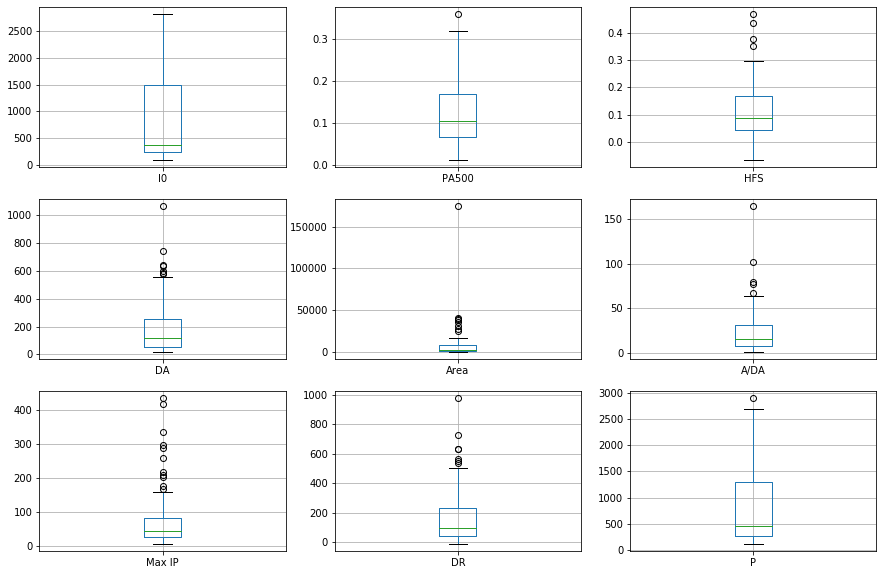

In [109]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")


In [110]:
for i in range(1, len(numerical)+1):
    
    iqr = df[numerical[i-1]].quantile(0.75) - df[numerical[i-1]].quantile(0.25)
    min_val = df[numerical[i-1]].quantile(0.25) - (iqr * 1.5)
    max_val = df[numerical[i-1]].quantile(0.75) + (iqr * 1.5)
    df[numerical[i-1]] = np.where(df[numerical[i-1]] > max_val, max_val, df[numerical[i-1]])
    df[numerical[i-1]] = np.where(df[numerical[i-1]] < min_val, min_val, df[numerical[i-1]])



In [111]:
df.isnull().sum()

Class     0
I0        0
PA500     0
HFS       0
DA        0
Area      0
A/DA      0
Max IP    0
DR        0
P         0
dtype: int64

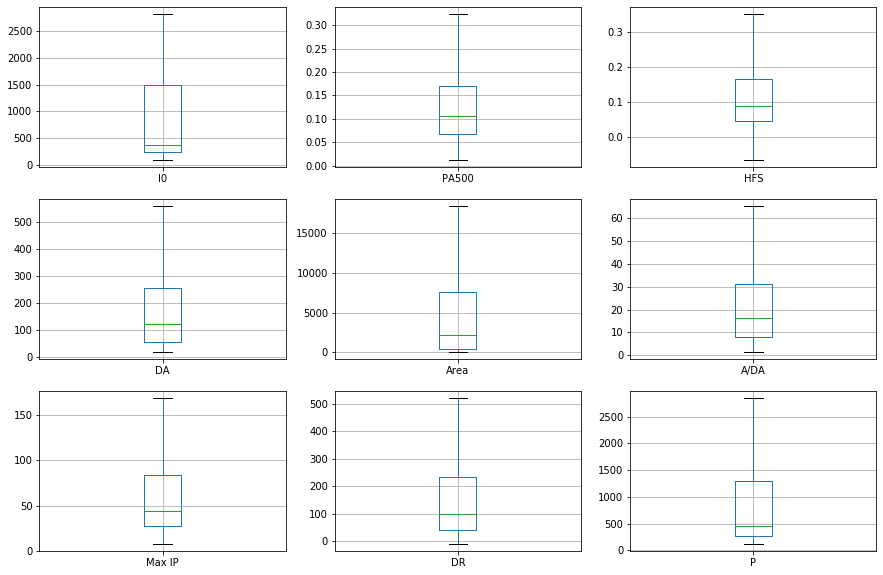

In [112]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")


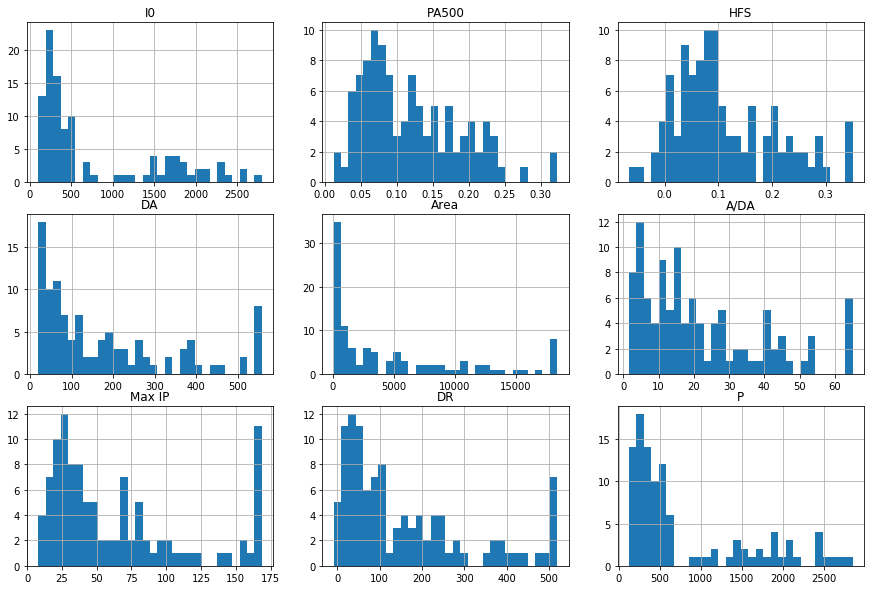

In [113]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(3,3,i)
    fig = df[numerical[i-1]].hist(bins = 30)
    fig.set_title(numerical[i-1])


In [114]:
df["Class"].unique()

array(['car', 'fad', 'mas', 'gla', 'con', 'adi'], dtype=object)

In [115]:
x = df.drop("Class", axis = 1)
y = df["Class"]

In [116]:
y.isnull().sum()

0

In [117]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0)

In [118]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 48 to 44
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I0      79 non-null     float64
 1   PA500   79 non-null     float64
 2   HFS     79 non-null     float64
 3   DA      79 non-null     float64
 4   Area    79 non-null     float64
 5   A/DA    79 non-null     float64
 6   Max IP  79 non-null     float64
 7   DR      79 non-null     float64
 8   P       79 non-null     float64
dtypes: float64(9)
memory usage: 6.2 KB


C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Mathan\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


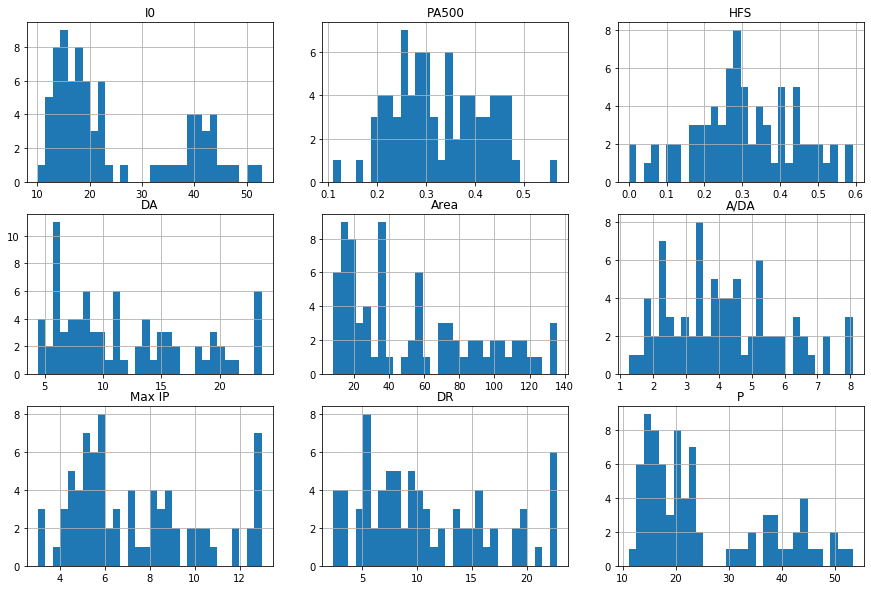

In [119]:
skew = xtrain.columns
plt.figure(figsize = (15, 10))

for i in range(1, len(skew)+1):
    plt.subplot(3,3,i)
    xtrain[skew[i-1]] = np.sqrt(xtrain[skew[i-1]])
    xtest[skew[i-1]] = np.sqrt(xtest[skew[i-1]])
    fig = xtrain[skew[i-1]].hist(bins = 30)
    fig.set_title(numerical[i-1])


In [120]:
xtrain.head()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
48,16.133119,0.281182,0.181141,7.669264,16.651097,2.171147,4.227135,7.485832,15.767797
30,16.492423,0.302416,0.069907,7.986825,26.813174,3.357175,4.481691,7.790425,16.938720
6,17.042745,0.379690,0.230343,8.639159,34.489784,3.992262,5.975226,8.095760,18.173258
78,38.232844,0.202091,0.222637,19.795101,74.659245,3.771602,7.565149,19.688677,37.800000
93,43.588989,0.233354,0.337336,16.511149,86.496205,5.238655,11.762622,15.326399,43.869328


In [121]:
xtest.head()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
99,48.989795,0.290043,0.469691,23.612895,135.733348,7.978220,12.993796,22.799195,49.474967
10,20.248457,0.563759,0.545348,15.994223,103.065742,6.443935,8.217251,15.708050,22.550839
75,27.748874,0.204030,0.049341,13.229501,18.603530,1.406216,5.022184,13.160271,25.589029
2,23.492111,0.482160,0.252052,16.272828,109.033902,6.700366,8.820051,15.930640,25.627514
24,18.779149,0.349283,0.301259,8.278155,32.652073,3.944366,6.609987,7.265867,19.563568


In [136]:
xtrain[xtrain.isna().any(axis=1)]
# xtest[xtest.isna().any(axis=1)]

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
27,15.811388,0.260898,NaN,7.561245,25.551934,3.379329,4.216276,7.469355,16.682584
103,40.000000,0.268156,NaN,20.903196,112.495965,5.381759,10.184925,20.787731,38.410565
88,41.231056,0.209720,0.324233,10.984216,111.045500,8.069247,10.968013,NaN,47.033798
70,41.522161,0.229584,NaN,20.102891,55.262708,2.748993,8.451484,19.979846,38.592573


In [137]:
xtrain['HFS'].fillna(xtrain['HFS'].mean(), inplace=True)
xtrain['DR'].fillna(xtrain['DR'].mean(), inplace=True)
xtest['HFS'].fillna(xtest['HFS'].mean(), inplace=True)


C:\Users\Mathan\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
model = RandomForestClassifier(random_state=1234)

In [140]:
model.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [141]:
ytrain.isnull().sum()

0

In [142]:
y_pred = model.predict(xtest)

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.7777777777777778